# Problem 4, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 4 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [3]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 4F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 4C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [4]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    #==============================================
    # TODO: Implement the SGD loss function.
    #==============================================
    losses = [(X[i].dot(w)-Y[i])**2 for i in range(len(X))]
    return np.sum(losses)
    

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
       
    return -2*(y-x.dot(w))*x



def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    #==============================================
    # TODO: Implement the SGD algorithm.
    #==============================================    
    ls = []
    w = w_start
    for i in range(N_epochs):
        ls.append(loss(X,Y,w))

        inds = list(range(len(X)))
        perm = np.random.permutation(range(len(X)))
        for i in perm:
            
            w -= eta * gradient(X[i],Y[i],w)



    return w, ls

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [5]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    Input:
        filename: given as a string.
    Output:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in sgd_data.csv and run SGD using the given parameters; print out the final weights.

In [6]:
#==============================================
# TODO:
# (1) load the dataset
# (2) run SGD using the given parameters
# (3) print out the final weights.
#==============================================
data = list(load_data('sgd_data.csv'))
# append x0 and split into X, Y
data = [[1] + list(pt) for pt in data]
X = [np.array(pt[:5]) for pt in data]
Y = [pt[5:] for pt in data]
start_w = [0.001,0.001,.001,.001,.001]
eta = np.e**(-15)
N_epochs = 1000

SGD(X,Y,start_w,eta,N_epochs)[0]

array([ -0.22789113,  -5.97854131,   3.988383  , -11.85701362,   8.91128886])

## Problem 4G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

In [7]:
exps = range(10,16)
losses = []
for exp in exps:
    losses.append([SGD(X,Y,start_w,np.e**(-exp),N_epochs)[1],exp])

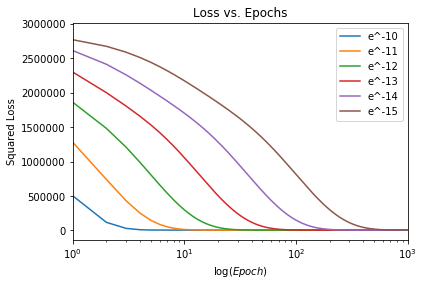

In [17]:
plt.xscale('log')
plt.xlabel('$\log({Epoch})$')
plt.ylabel('Squared Loss')
plt.title('Loss vs. Epochs')
plt.xlim(1,10**3)
for loss in losses:
    plt.plot(range(N_epochs),loss[0], label = 'e^' +  str(-loss[1]))
plt.legend()



## Problem 4H

Provide your code for computing the least-squares analytical solution below.

In [9]:
w = np.linalg.pinv(X).dot(np.array(Y)).transpose()

In [10]:
w

array([[ -0.31644251,  -5.99157048,   4.01509955, -11.93325972,
          8.99061096]])